In [30]:
import numpy as np
import scipy.misc
from keras import backend as K
# from keras import initializations
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [8]:
train_data = np.load('train_cats_and_dogs_images.npz')['arr_0'].reshape([-1, 150, 150, 3])
# the features were saved in order, so recreating the labels is easy
train_labels = np.array([0] * 1000 + [1] * 1000)

test_data = np.load('test_cats_and_dogs_images.npz')['arr_0'].reshape([-1, 150, 150, 3])
test_labels = np.array([0] * 400 + [1] * 400)

In [9]:
train = np.zeros([2000, 150, 150, 3])
for i in range(2000):
    train[i] = train_data[i]

In [10]:
test = np.zeros([800, 150, 150, 3])
for i in range(800):
    test[i] = test_data[i]

In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_datagen.fit(train)
test_datagen.fit(test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
history = model.fit_generator(train_datagen.flow(train, train_labels, batch_size=16),
                              samples_per_epoch=train.shape[0],
                              nb_epoch=30, 
                              validation_data=test_datagen.flow(test, test_labels))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=125, epochs=30)`
  after removing the cwd from sys.path.


Epoch 1/30
125/125 [==============================] - 128s 1s/step - loss: 0.6659 - acc: 0.6095 - val_loss: 0.6749 - val_acc: 0.5463
Epoch 2/30
125/125 [==============================] - 122s 976ms/step - loss: 0.6399 - acc: 0.6520 - val_loss: 0.6440 - val_acc: 0.5787
Epoch 3/30
125/125 [==============================] - 116s 929ms/step - loss: 0.6183 - acc: 0.6705 - val_loss: 0.5920 - val_acc: 0.6863
Epoch 4/30
125/125 [==============================] - 120s 959ms/step - loss: 0.5964 - acc: 0.6925 - val_loss: 0.5925 - val_acc: 0.6675
Epoch 5/30
125/125 [==============================] - 90s 718ms/step - loss: 0.5912 - acc: 0.7205 - val_loss: 0.5511 - val_acc: 0.6987
Epoch 6/30
125/125 [==============================] - 113s 905ms/step - loss: 0.5575 - acc: 0.7185 - val_loss: 0.5345 - val_acc: 0.7188
Epoch 7/30
125/125 [==============================] - 106s 848ms/step - loss: 0.5428 - acc: 0.7320 - val_loss: 0.5585 - val_acc: 0.7087
Epoch 8/30
125/125 [==============================] 

In [31]:
import matplotlib.pyplot as plt

def visualize_history(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

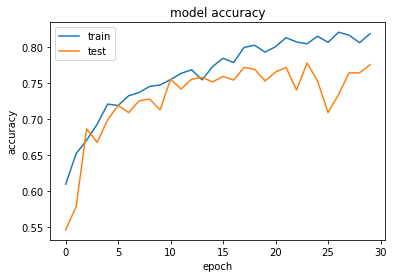

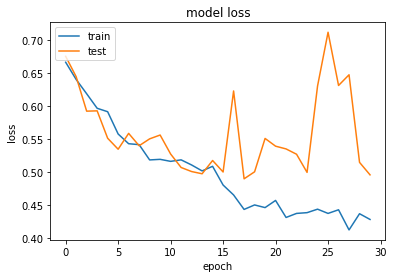

In [32]:
visualize_history(history)

In [ ]:
model.save_weights('first_try.h5')  # always save your weights after training or during training